# CMPE351 Assignment 1: New York City (NYC) Housing Sales Data Analysis

### Importing Libraries and Filtering Dataset

Note that I answer the the Assignment questions out of order because I provide my analysis as I write my code. Each answer is labelled as per instructions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [2]:
# Root folder for the sales data
rootFolder = r'C:\Users\Jade Watson\Documents\JetBrains\Assignment1\Assignment1-dataset\\'

# Read each csv file as a dataframe
# Note that all numeric values with thousands contain commas which are removed using thousands
# Bronx Dataframes
bronx20df = pd.read_csv(rootFolder +'2020_bronx.csv',thousands= ',')
#Manhattan Dataframes
manh20df = pd.read_csv(rootFolder +'2020_manhattan.csv',thousands= ',')

In [3]:
# Two selected boroughs (Bronx and Manhattan) 2020 data will be combined for further analysis
selectedBorough1Data = bronx20df
selectedBorough2Data = manh20df

# Retain Borough numbers of each dataset for identification later on
selectedBorough1Number = selectedBorough1Data.iat[1, 0]
selectedBorough2Number = selectedBorough2Data.iat[1, 0]

# Combine borough data
totalData = pd.concat([selectedBorough1Data, selectedBorough2Data])

### Data Inspection and Visualization

In [4]:
# shape of dataset
totalData.shape

(25912, 21)

Note 8150 records are from the Bronx and the remaining 17762 records are from Manhattan.

In [5]:
# Data preview
totalData.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2.0,BATHGATE,01 ONE FAMILY DWELLINGS,1,3029.0,36.0,NaN,A5,418 EAST 180 STREET,NaN,...,1.0,0.0,1.0,1568.0,1526.0,1899.0,1.0,A5,0.0,2020-07-09
1,2.0,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030.0,65.0,NaN,A1,4455 PARK AVENUE,NaN,...,1.0,0.0,1.0,1622.0,1587.0,1899.0,1.0,A1,458000.0,2020-01-31
2,2.0,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030.0,67.0,NaN,A1,4451 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1495.0,1899.0,1.0,A1,275000.0,2020-03-16
3,2.0,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030.0,67.0,NaN,A1,4451 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1495.0,1899.0,1.0,A1,475000.0,2020-07-23
4,2.0,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039.0,29.0,NaN,A9,2327 WASHINGTON AVE,NaN,...,1.0,0.0,1.0,1095.0,1260.0,1910.0,1.0,A9,165000.0,2020-03-02


In [6]:
totalData.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
17757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Delete columns and rows with all null values.
del totalData['EASE-MENT']
totalData = totalData.dropna(axis = 0, inplace = False,how = 'all')

In [8]:
# Checking to see if columns and rows were removed
totalData.shape

(18022, 20)

In [9]:
# Check for duplicates
sum(totalData.duplicated(totalData.columns))

15

In [10]:
# Remove duplicates
totalData = totalData.drop_duplicates(totalData.columns, keep='last')
sum(totalData.duplicated(totalData.columns))

0

In [11]:
# Description of columns
totalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18007 entries, 0 to 11965
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         18007 non-null  float64
 1   NEIGHBORHOOD                    18007 non-null  object 
 2   BUILDING CLASS CATEGORY         18007 non-null  object 
 3   TAX CLASS AT PRESENT            18004 non-null  object 
 4   BLOCK                           18007 non-null  float64
 5   LOT                             18007 non-null  float64
 6   BUILDING CLASS AT PRESENT       18004 non-null  object 
 7   ADDRESS                         18007 non-null  object 
 8   APARTMENT NUMBER                6204 non-null   object 
 9   ZIP CODE                        18007 non-null  float64
 10  RESIDENTIAL UNITS               11268 non-null  float64
 11  COMMERCIAL UNITS                5949 non-null   float64
 12  TOTAL UNITS                     

Transform columns to a more appropriate data type. This is determined from the glossary provided with the dataset.

In [12]:
# Convert columns to appropriate data type
totalData['TAX CLASS AT TIME OF SALE'] = totalData['TAX CLASS AT TIME OF SALE'].astype('category')
totalData['TAX CLASS AT PRESENT'] = totalData['TAX CLASS AT PRESENT'].astype('category')
totalData['BOROUGH'] = totalData['BOROUGH'].astype('category')
totalData['SALE DATE'] = pd.to_datetime(totalData['SALE DATE'], errors='coerce')

In [13]:
# Columns with a Null value present
totalData.columns[totalData.isnull().any()]

Index(['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT'],
      dtype='object')

In [14]:
# Percentage of null values in column
missValues = totalData.isnull().sum()/len(totalData)
missValues = missValues[missValues>0]*100
missValues.sort_values(inplace=True, ascending=False)
missValues

LAND SQUARE FEET             69.339701
GROSS SQUARE FEET            69.339701
COMMERCIAL UNITS             66.962848
APARTMENT NUMBER             65.546732
RESIDENTIAL UNITS            37.424335
TOTAL UNITS                  35.047482
YEAR BUILT                   10.434831
TAX CLASS AT PRESENT          0.016660
BUILDING CLASS AT PRESENT     0.016660
dtype: float64

The percentage of missing values in any of the features is not greater than 80% and thus cannot be removed immediately as they may provide significant insight house price prediction.

<module 'seaborn' from 'C:\\Users\\Jade Watson\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

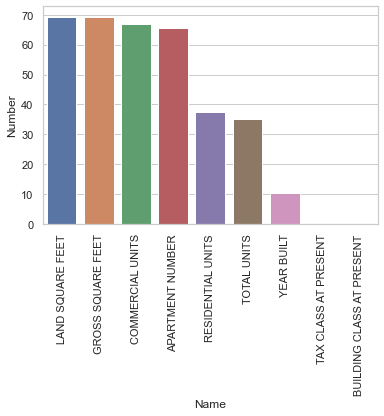

In [15]:
# Setup missing values as a dataframe for easy plotting
missValues=missValues.to_frame()
# Column for the name and number of missing values
missValues.columns=['Number']
missValues.index.names=['Name']
missValues['Name']=missValues.index
# Plot
sns.set(style='whitegrid', color_codes=True)
sns.barplot(x='Name', y='Number', data=missValues)
plt.xticks(rotation=90)
sns

### RQ1.2
Land/Gross Square Feet have many missing values, however, these features will contribute to sale price prediction. Thus the missing values will be replaced with the mean of their respective Borough.

To focus on housing sale price predictions, the commercial unit and total unit features will be dropped instead of being replaced to avoid sale price skewness and artificial outliers. Commercial properties such as office buildings and warehouses are more likely to have a higher sale price than houses. Consequently, since we are not focusing on commercial properties, address and apartment number will be removed.

Records with missing Residential Unit information will be dropped as this feature is likely to contribute to sale price prediction.

Features such as Year Built, Tax Class at Present, and Building Class at Present are minimal missing data and are not likely to contribute to sale price and thus the empty rows will be removed.

In [16]:
del totalData['COMMERCIAL UNITS']
del totalData['TOTAL UNITS']
del totalData['ADDRESS']
del totalData['APARTMENT NUMBER']

In [17]:
# remove listings with missing values in Residential Unit, Tax Class at Present, and Building Class at Present
totalData = totalData.dropna(axis=0,subset=['RESIDENTIAL UNITS','TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT','YEAR BUILT'])

In [18]:
# Calculate mean of Land/Gross Square Feet for each borough
borough1Mean = totalData[totalData['BOROUGH'] == selectedBorough1Number]['LAND SQUARE FEET'].mean()
borough2Mean = totalData[totalData['BOROUGH'] == selectedBorough2Number]['LAND SQUARE FEET'].mean()
gross1Mean = totalData[totalData['BOROUGH'] == selectedBorough1Number]['GROSS SQUARE FEET'].mean()
gross2Mean = totalData[totalData['BOROUGH'] == selectedBorough2Number]['GROSS SQUARE FEET'].mean()
# In each borough, add mean values to the listings with no information
totalDataTemp1 = totalData[totalData['BOROUGH'] == selectedBorough1Number]
totalDataTemp2 = totalData[totalData['BOROUGH'] == selectedBorough2Number]
totalDataTemp1['LAND SQUARE FEET'] = totalDataTemp1['LAND SQUARE FEET'].fillna(borough1Mean)
totalDataTemp2['LAND SQUARE FEET'] = totalDataTemp2['LAND SQUARE FEET'].fillna(borough2Mean)
totalDataTemp1['GROSS SQUARE FEET'] = totalDataTemp1['GROSS SQUARE FEET'].fillna(gross1Mean)
totalDataTemp2['GROSS SQUARE FEET'] = totalDataTemp2['GROSS SQUARE FEET'].fillna(gross2Mean)
# Overwrite current total data will all null values filled in
totalData = pd.concat([totalDataTemp1, totalDataTemp2])

Cleaning and filtering of the data is done. The raw features of data are now ready to be analyzed.

In [19]:
# Statistical analysis of numerical values
numericData = totalData.select_dtypes(include=[np.number])
numericData.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,9581.000000,9581.000000,9581.000000,9581.000000,9.581000e+03,9.581000e+03,9581.000000,9.581000e+03
mean,2456.424590,716.479699,10223.397766,4.649723,3.306740e+04,3.939388e+04,1956.585012,2.339233e+06
std,1733.702637,924.875640,218.719023,90.623860,3.833994e+05,1.380703e+05,41.360713,1.714940e+07
min,8.000000,1.000000,10001.000000,0.000000,0.000000e+00,0.000000e+00,1111.000000,0.000000e+00
25%,1057.000000,37.000000,10019.000000,1.000000,2.500000e+03,2.406000e+03,1920.000000,0.000000e+00
50%,1845.000000,146.000000,10065.000000,1.000000,8.615968e+03,1.740266e+04,1952.000000,5.850000e+05
75%,4052.000000,1198.000000,10465.000000,2.000000,8.615968e+03,5.720204e+04,1998.000000,1.525000e+06
max,5955.000000,9116.000000,10475.000000,8764.000000,6.777433e+06,8.942176e+06,2021.000000,9.780904e+08


### RQ1.2...
It is evident that the mean sale price for new york housing based off of the Bronx and Manhattan Boroughs is 2,339,233 dollars with a range of 0 - 978,090,400 dollars. According to the glossary, a 0 dollar sale price indicates a transfer of ownership without a cash consideration. This heavily influences the distribution of sale price over 2020. For this reason, all sale prices of 0 will be dropped as they do not contribute to an accurate prediction of future housing sale price.

In [20]:
totalData = totalData[totalData[' SALE PRICE '] > 0]

To find if or what features contribute to house price prediction, a correlation analysis is performed.

In [21]:
# numeric correlation
corr = totalData.corr()
corr[' SALE PRICE '].sort_values(ascending = False)

 SALE PRICE          1.000000
GROSS SQUARE FEET    0.118372
RESIDENTIAL UNITS    0.030599
LAND SQUARE FEET    -0.003855
YEAR BUILT          -0.013224
LOT                 -0.027256
ZIP CODE            -0.093752
BLOCK               -0.096776
Name:  SALE PRICE , dtype: float64

### RQ1.2...
It is evident that Gross Square Feet and Residential Units are the two features that contribute to Sale Price. However, both do not heavily contribute to Sale Price as indicated by the numerical value. The strongest correlation is represented by 1. These features will be further investigated below.

### Investigate and Visualize Data Features

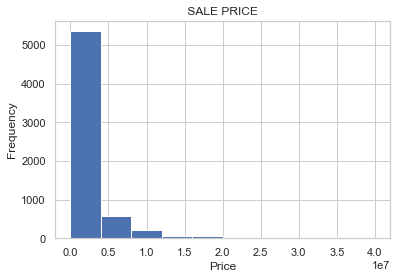

In [22]:
# Histogram of Sale Price
totalData.hist(column=[' SALE PRICE '],range=[0,40000000])
plt.xlabel("Price")
plt.ylabel('Frequency')
plt.show()

In [23]:
# Skewness
totalData[' SALE PRICE '].skew()

33.216356301057765

## RQ1.2...
 It is evident that the majority of house prices lies  0-15,000,000 dollars. Sale Price is highly right skewed and therefore applying a log transform will give more accurate results.

-3.4887094299155406


<AxesSubplot:xlabel=' SALE PRICE ', ylabel='Density'>

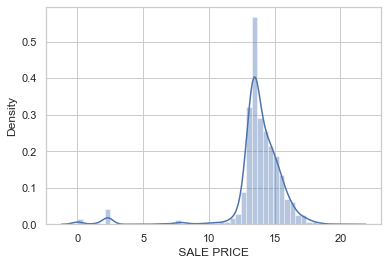

In [24]:
houseSales = np.log(totalData[' SALE PRICE '])
print(houseSales.skew())
sns.distplot(houseSales)

<AxesSubplot:xlabel='GROSS SQUARE FEET'>

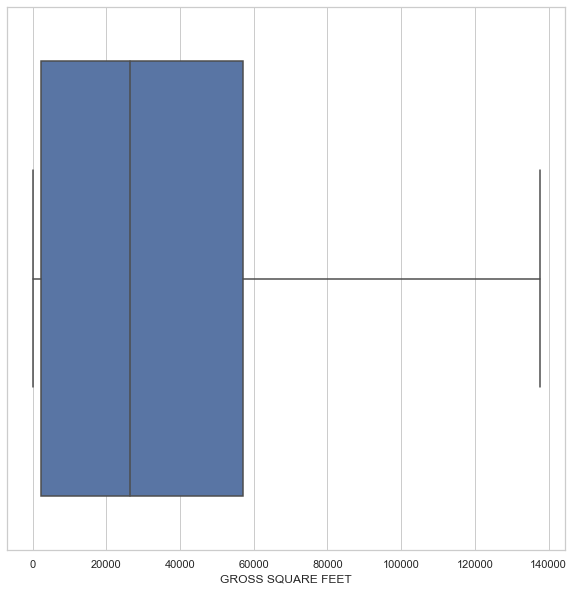

In [25]:
# Boxplot of Gross Square Feet
plt.figure(figsize=(10,10))
sns.boxplot(x='GROSS SQUARE FEET', data=totalData,showfliers=False)

## RQ1.2...
The boxplot illustrates the distribution of gross square feet. It is evident that the median gross square footage is 27,000. This indicates that the expected square footage for New York house is 27,000 square feet. However, a large outlier is shown at just less than 140,000 square feet. This could possible indicate that the houses with larger square footage are more expensive.

[(0.0, 60.0)]

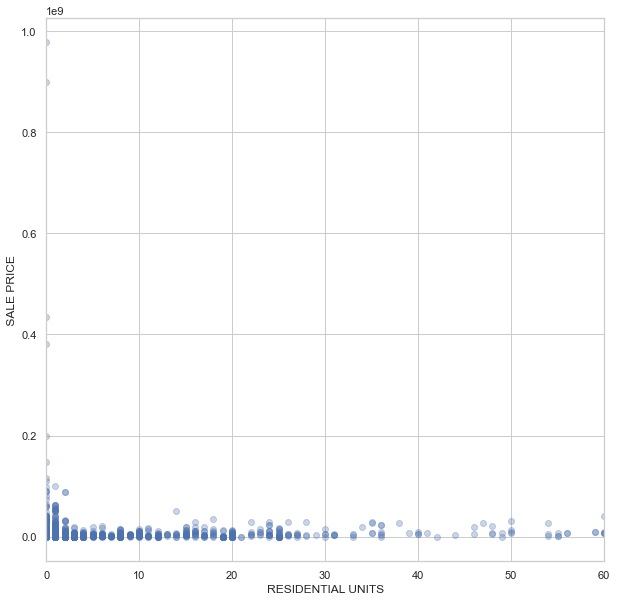

In [26]:
plt.figure(figsize=(10,10))
resUnitPlot = sns.regplot(x='RESIDENTIAL UNITS', y=' SALE PRICE ', data=totalData, fit_reg=False, scatter_kws={'alpha':0.3},)
resUnitPlot.set(xlim=(0,60))

## Q1.2...
It is evident that the majority of residential units is between 0-10. The frequency of residential units decreases as the number of units increases. I was surprised by this result because intuitively a house is considered 1 residential unit. Thus, a fraction of the data includes apartment buildings or listings wiht more than one residential unit.

Investigate categorical data

In [27]:
catData = totalData.select_dtypes(exclude=[np.number])
catData.describe()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE
count,6385.0,6385,6385,6385,6385,6385.0,6385,6385
unique,2.0,75,32,9,106,3.0,107,276
top,1.0,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,R4,2.0,R4,2020-02-28 00:00:00
freq,3631.0,364,2796,3201,2827,3609.0,2796,97
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-02 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-31 00:00:00


In [28]:
# TAX CLASS AT PRESENT
pivot = totalData.pivot_table(index='TAX CLASS AT PRESENT', values=' SALE PRICE ', aggfunc=np.median)
pivot

,SALE PRICE
TAX CLASS AT PRESENT,
1,610000.0
1A,360000.0
1B,437500.0
1C,1800000.0
2,1680113.0
2A,900000.0
2B,2300000.0
2C,2167500.0
4,3800000.0


<AxesSubplot:xlabel='TAX CLASS AT PRESENT'>

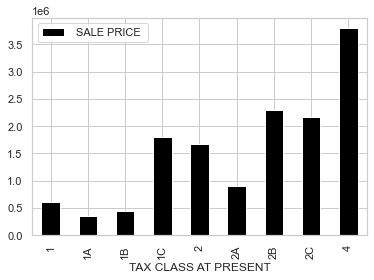

In [29]:
pivot.plot(kind='bar', color='black')

## Q1.2...
Tax Class at Present represents the use of the property. For example, 4 describes commercial use such as offices or factories whereas 1 describes family homes. The hypothesis that commercial buildings such as warehouses and office buildings cost more than residential homes is proven. This is due to the required space and/land required for commercial buildings

To see if multi-correlation between features exists, a heatmap is generated.

<AxesSubplot:>

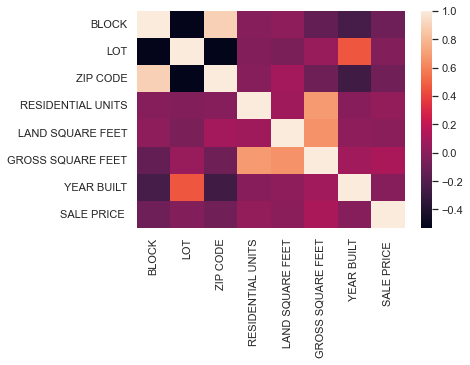

In [30]:
# Correlation Visualization
sns.heatmap(corr)

## RQ1.3
The shades of brown indicate high correlation. The following features are correlated, however, are not strongly correlated with Sales Price.

- Block and Zip Code
- Residential Units, Gross Square Feet, and Land Square Feet

Zip code and block are correlated because they describe the location of the property. Since they are negatively correlated with sale price these columns will be removed. As mentioned above during the analysis of of gross square feet, more land is required for an increase in the number of residential units.

In [31]:
# drop insignificant columns according to the given glossary
del totalData['BLOCK']
del totalData['ZIP CODE']
del totalData['LOT']
del totalData['SALE DATE']
del totalData['BUILDING CLASS AT PRESENT']
del totalData['BUILDING CLASS AT TIME OF SALE']
del totalData['NEIGHBORHOOD']
#del totalData['YEAR BUILT']

In [32]:
totalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6385 entries, 1 to 11962
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   BOROUGH                    6385 non-null   category
 1   BUILDING CLASS CATEGORY    6385 non-null   object  
 2   TAX CLASS AT PRESENT       6385 non-null   category
 3   RESIDENTIAL UNITS          6385 non-null   float64 
 4   LAND SQUARE FEET           6385 non-null   float64 
 5   GROSS SQUARE FEET          6385 non-null   float64 
 6   YEAR BUILT                 6385 non-null   float64 
 7   TAX CLASS AT TIME OF SALE  6385 non-null   category
 8    SALE PRICE                6385 non-null   float64 
dtypes: category(3), float64(5), object(1)
memory usage: 368.5+ KB


In [33]:
numData = totalData.select_dtypes(include=[np.number])
numData.columns

Index(['RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'YEAR BUILT', ' SALE PRICE '],
      dtype='object')

### Transform Numerical and Categorical Data

In [34]:
#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = totalData[numData.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
totalData[skewed] = np.log1p(totalData[skewed])

In [35]:
scaler = StandardScaler()
scaler.fit(totalData[numData.columns])
scaled = scaler.transform(totalData[numData.columns])

for i, col in enumerate(numData.columns):
    totalData[col] = scaled[:,i]

In [36]:
# One hot encoding categorical columns
oneHotFeatures = ['BOROUGH','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']
oneHotEncoded = pd.get_dummies(totalData[oneHotFeatures])
oneHotEncoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6385 entries, 1 to 11962
Data columns (total 47 columns):
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   BOROUGH_1.0                                                         6385 non-null   uint8
 1   BOROUGH_2.0                                                         6385 non-null   uint8
 2   BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                     6385 non-null   uint8
 3   BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                     6385 non-null   uint8
 4   BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                   6385 non-null   uint8
 5   BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                       6385 non-null   uint8
 6   BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND                  6385 non-null   uint8
 7   BUILDING CLASS CATEGORY_06 TAX C

In [37]:
# Replacing categorical columns with dummies
new = totalData.drop(oneHotFeatures,axis=1)
new = pd.concat([new,oneHotEncoded],axis=1)

In [38]:
# Setting up for dataset split
YNew = new[' SALE PRICE ']
XNew = new.drop(' SALE PRICE ', axis=1)
XNew.shape , YNew.shape

((6385, 51), (6385,))

## RQ1.4
 In this section I will provide a summary of my analysis above. To begin, I filtered all the missing values accordingly and created a new variable called totalData that stores the filtered data. Next, I looked at the sale price feature as it is the feature of interest. A summary of statistics, distribution and skewness is provided. Since it was highly right skewed I transformed the sale price data using log. In addition, I investigated the number of residential units, and gross square feet since those features had the highest correlation with sale price. Next, I determined if multi-collinearity exists. I found that residential units, land square feet, and gross square feet are highly correlated implying that larger properties require more space and are therefore more expensive. Lastly, I transformed both numeric and categorical data to provide the most accurate prediction. To transform the numeric data, I normalized the data using the logarithmic function. To transform the categorical data, I used the hot encoder method. Overall, I created a new variable called new that includes the optimal dataset for regression analysis.

### Split Dataset for Testing and Training

In [39]:
# Splitting dataset
XTrain ,XTest, YTrain , YTest = train_test_split(XNew, YNew, test_size = 0.10)
# Training set
XTrain.shape , YTrain.shape

((5746, 51), (5746,))

RQ1.1: The data is split into a testing and training set. 10% of the 2020 listing pricing are used for testing, and the other 90% is used for training. I decided not to use 2018 and 2019 data for testing or training because 2020 provides the most recent data and a more accurate representation of New York housing price and thus would provide a more accurate prediction.

In [40]:
# Testing set
XTest.shape, YTest.shape

((639, 51), (639,))

### Prediction using Regression Models

In [41]:
def rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

In [42]:
# Random Forest Regressor
rfRegr = RandomForestRegressor()
rfRegr.fit(XTrain, YTrain)
YPredRf = rfRegr.predict(XTest)
rmse(YTest,YPredRf)

0.8488099670707836

In [43]:
# Ridge Regression
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(XTrain, YTrain)
YPredRidge = ridge.predict(XTest)
rmse(YTest,YPredRidge)

0.8302963494991957

## Part 2
 I decided to use a random forest regressor and a ridge regressor. I choose to use a random forest regressor because it provides higher accuracy through cross validation. In addition, I used a ridge regressor because there is a degree of multi-collinearity between the aforementioned features. Since the percentage of correlation between features was too low to create a new feature, it increases the multi-collinearity of the data. Overall, the Ridge Regressor works best for this dataset.